# Projeto Final - AceleraDev Data Science 2020

### Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import squarify as sqy
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

import warnings
warnings.simplefilter(action = 'ignore')

### Importando DATASETs

##### Lendo DATASET

##### Criando um dicionário(features_types) para alterar o tipo do dtype de float64 para float16

In [2]:
features = pd.read_csv('features_dictionary.csv')

In [3]:
features = features.query('Dtype_Ajustado == "int16" or Dtype_Ajustado == "float16"')

In [4]:
features_types = dict(list(features[['Column','Dtype_Ajustado']].values))

##### DataFrame principal

In [5]:
df = pd.read_csv('estaticos_market.csv', dtype= features_types, error_bad_lines=False)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462298 entries, 0 to 462297
Columns: 182 entries, Unnamed: 0 to qt_filiais
dtypes: bool(9), float16(133), float64(11), int16(2), object(27)
memory usage: 209.4+ MB


In [7]:
df.shape

(462298, 182)

In [8]:
df.head()

,Unnamed: 0,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,...,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,...,43.75,93.25,19.171875,26.0,26.0,27.0,0.0,-3.703125,0.0,0
1,1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


##### DataFrames auxiliares

In [9]:
df1 = pd.read_csv('estaticos_portfolio1.csv', usecols=['id'])
df2 = pd.read_csv('estaticos_portfolio2.csv', usecols=['id'])
df3 = pd.read_csv('estaticos_portfolio3.csv', usecols=['id'])

In [10]:
df1.head(1)

,id
0,dabe79bec87c88ae04e869bf6bd321ee5e1893cecf6625...


In [11]:
df2.head(1)

,id
0,09e95c1a84049001d086470a8f320a19b076f955a89122...


In [12]:
df3.head(1)

,id
0,bb61c09449a1c1f8b78955d8b7a7f73599e78358993fe2...


In [13]:
df.columns

Index(['Unnamed: 0', 'id', 'fl_matriz', 'de_natureza_juridica', 'sg_uf',
       'natureza_juridica_macro', 'de_ramo', 'setor', 'idade_empresa_anos',
       'idade_emp_cat',
       ...
       'media_meses_servicos', 'max_meses_servicos', 'min_meses_servicos',
       'qt_funcionarios', 'qt_funcionarios_12meses', 'qt_funcionarios_24meses',
       'tx_crescimento_12meses', 'tx_crescimento_24meses', 'tx_rotatividade',
       'qt_filiais'],
      dtype='object', length=182)

### Analise de colunas nulas

##### As colunas com todos os dados nulos não tem nenhuma relevância para a análise

In [14]:
colunas_nulas = df.isna().sum()
colunas_nulas = colunas_nulas[colunas_nulas.isin([df.shape[0]])]
lista_colunas_nulas = list(colunas_nulas.index)
qtd_lista_colunas_nulas = len(list(colunas_nulas.index))
print('Existem', qtd_lista_colunas_nulas, 'São elas', lista_colunas_nulas)

Existem 5 São elas ['qt_alteracao_socio_total', 'qt_alteracao_socio_90d', 'qt_alteracao_socio_180d', 'qt_alteracao_socio_365d', 'grau_instrucao_macro_desconhecido']


In [15]:
# Eliminando as colunas com todas as observações nulas
df.drop(columns=lista_colunas_nulas, inplace=True)
print('O novo shape é', df.shape)

O novo shape é (462298, 177)


##### As colunas com mais de 50% dos dados nulos não tem muita relevância para a análise, para chegar no número de 50% alem da quantidade de nulos foi levado em consideração a relevância da coluna para a solução.

In [16]:
colunas_nulas_perc = (df.isna().sum()/df.shape[0]*100) > 50.0 
colunas_nulas_perc = colunas_nulas_perc[colunas_nulas_perc.isin([True])]
len(list(colunas_nulas_perc.index))
lista_colunas_nulas_perc = list(colunas_nulas_perc.index)
qtd_lista_colunas_nulas_perc = len(list(colunas_nulas_perc.index))
print('Existem', qtd_lista_colunas_nulas_perc, 'São elas', lista_colunas_nulas_perc)

Existem 126 São elas ['vl_total_tancagem', 'vl_total_veiculos_antt', 'vl_total_veiculos_leves', 'vl_total_veiculos_pesados', 'qt_art', 'vl_total_tancagem_grupo', 'vl_total_veiculos_antt_grupo', 'vl_potenc_cons_oleo_gas', 'de_indicador_telefone', 'vl_frota', 'qt_socios_st_suspensa', 'qt_socios_masculino', 'qt_socios_feminino', 'qt_socios_pep', 'qt_socios_pj_ativos', 'qt_socios_pj_nulos', 'qt_socios_pj_baixados', 'qt_socios_pj_suspensos', 'qt_socios_pj_inaptos', 'vl_idade_media_socios_pj', 'vl_idade_maxima_socios_pj', 'vl_idade_minima_socios_pj', 'qt_coligados', 'qt_socios_coligados', 'qt_coligados_matriz', 'qt_coligados_ativo', 'qt_coligados_baixada', 'qt_coligados_inapta', 'qt_coligados_suspensa', 'qt_coligados_nula', 'idade_media_coligadas', 'idade_maxima_coligadas', 'idade_minima_coligadas', 'coligada_mais_nova_ativa', 'coligada_mais_antiga_ativa', 'idade_media_coligadas_ativas', 'coligada_mais_nova_baixada', 'coligada_mais_antiga_baixada', 'idade_media_coligadas_baixadas', 'qt_colig

In [17]:
# Eliminando as colunas com observações nulas em mais de 50%
df.drop(columns=lista_colunas_nulas_perc, inplace=True)
print('O novo shape é', df.shape)

O novo shape é (462298, 51)


##### Verificar as colunas nulas restantes, e analisar a relevância

In [18]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

qt_socios_st_regular                     0.335102
idade_minima_socios                      0.327931
idade_maxima_socios                      0.327931
idade_media_socios                       0.327931
empsetorcensitariofaixarendapopulacao    0.311118
qt_socios_pj                             0.248954
qt_socios_pf                             0.248954
qt_socios                                0.248954
fl_optante_simei                         0.178917
fl_optante_simples                       0.178917
nm_micro_regiao                          0.126970
nm_meso_regiao                           0.126970
nu_meses_rescencia                       0.097937
de_faixa_faturamento_estimado            0.059514
vl_faturamento_estimado_grupo_aux        0.059514
de_faixa_faturamento_estimado_grupo      0.059514
vl_faturamento_estimado_aux              0.059514
de_saude_rescencia                       0.032124
de_saude_tributaria                      0.032124
de_nivel_atividade                       0.024158


##### Analise das colunas restantes, para verificar a possibilidade de eliminar mais alguma coluna irrelevante para a solução.

In [19]:
colunas_drop = ['Unnamed: 0','fl_email','fl_telefone','qt_socios_st_regular','qt_socios_pj',
                'qt_socios_pf','fl_simples_irregular','fl_optante_simei','fl_optante_simples']
print('Colunas irrelevantes para a solução', len(colunas_drop))

Colunas irrelevantes para a solução 9


**Unnamed**: 0: numeração das observações

**fl_email**: boolean value, true if the cnpj has an email registered at the IRF database. 

**fl_telefone**: boolean value, true if the company has a phone number registered in IRS database.

**qt_socios_st_regular**: integer value, quantity of partners with regular situation under IRS - Receita Federal

**qt_socios_pj**:  integer value, quantity of partners/shareholders of the cnpj that are companies

**qt_socios_pf**: integer value, quantity of partners/shareholders of the cnpj that are persons

**fl_simples_irregular**: boolean, true if the company is taxed under the SIMPLES regime and has a impeditive CNAE (economic activities that are not allowed to be taxed according to the simples regime) revenue above the limit of the regime.

**fl_optante_simei**: boolean, true if the company is taxed as an MEI - Individual Micro Entrepreneur (Micro Empreendedor Individual)

**fl_optante_simples**: boolean, true if the company is taxed according to SIMPLES regime

In [20]:
# Eliminando colunas julgadas irrelevantes
df.drop(columns=colunas_drop, inplace=True)
print('O novo shape é', df.shape)

O novo shape é (462298, 42)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462298 entries, 0 to 462297
Data columns (total 42 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     462298 non-null  object 
 1   fl_matriz                              462298 non-null  bool   
 2   de_natureza_juridica                   462298 non-null  object 
 3   sg_uf                                  462298 non-null  object 
 4   natureza_juridica_macro                462298 non-null  object 
 5   de_ramo                                462298 non-null  object 
 6   setor                                  460371 non-null  object 
 7   idade_empresa_anos                     462298 non-null  float64
 8   idade_emp_cat                          462298 non-null  object 
 9   fl_me                                  462298 non-null  bool   
 10  fl_sa                                  462298 non-null  

##### Criando um novo dataset, substituindo a media nas colunas numéricas e dropando os dados nulos da demais colunas para análise

In [22]:
#df_nao_nulos = df.fillna(df.mean())

In [23]:
#df_nao_nulos = df.dropna()
#print('O novo shape é', df_nao_nulos.shape)

In [24]:
#Dados para teste de validação do cluster
base = ['id','sg_uf','de_ramo','setor','nm_divisao','nm_segmento','de_nivel_atividade',
        'nm_meso_regiao','nm_micro_regiao','de_faixa_faturamento_estimado','idade_empresa_anos',
        'de_natureza_juridica','fl_me','fl_sa','fl_epp','fl_mei','fl_ltda','qt_filiais']
train = ['cod_de_natureza_juridica','cod_sg_uf','cod_de_ramo','cod_setor','cod_nm_divisao','cod_nm_segmento',
         'cod_de_nivel_atividade','cod_nm_meso_regiao','cod_de_faixa_faturamento_estimado']
print('O total de colunas selecionadas para a solução', len(base))
print('O total de colunas selecionadas para treino da solução', len(train))

df_nao_nulos = df[base]
# Retirando as observações com nulos
#df_nao_nulos.dropna(inplace=True)
df_nao_nulos.fillna('SEM INFORMAÇÃO', inplace=True)

O total de colunas selecionadas para a solução 18
O total de colunas selecionadas para treino da solução 9


**Feature engineering**
 
Analise das colunas nulas com todo os dados faltantes, 5 colunas foram eliminadas.

Analise das colunas nulas com mais de 50% dos dados faltantes, 126 colunas foram eliminadas.

As colunas restantes foi feita uma analise manual, para ver a relevância dos dados para a solução, 9 colunas foram eliminadas.

Com as colunas restantes foram escolhidas manualmente 18, os dados nulos foram tratados inserindo 'SEM INFORMAÇÃO', já que todos eram categóricos, dessa forma nenhuma observação ficou de fora da analise.

Para treinamento do modelo forma usadas 9 dessas featuras julgadas mais importantes para a solução.

In [25]:
print('Tamanho Dataset original', df.shape, 'Tamanho Dataset base', df_nao_nulos.shape)

Tamanho Dataset original (462298, 42) Tamanho Dataset base (462298, 18)


In [26]:
# Exportando csv apenas colunas tratadas, particionado para carregar no GitHub e desenvolver o app no Heroku
df[base].loc[:115000, :].to_csv('data/market1.csv', index=False)
df[base].loc[115001:230000, :].to_csv('data/market2.csv', index=False)
df[base].loc[230001:345000, :].to_csv('data/market3.csv', index=False)
df[base].loc[345001:, :].to_csv('data/market4.csv', index=False)
df1.to_csv('data/port1.csv', index=False)
df2.to_csv('data/port2.csv', index=False)
df3.to_csv('data/port3.csv', index=False)

### Exploração de Dados

##### Ajustando todos os dados para numéricos

In [27]:
# Transformando as colunas com o LabelEncoder
colunas_transform = list(df_nao_nulos.select_dtypes(include=['object','bool']).columns)
colunas_transform.remove('id')

encoder = LabelEncoder()
for label in colunas_transform:
    label_coluna = 'cod_' + label
    df_nao_nulos[label_coluna] = encoder.fit_transform(df_nao_nulos[label])

In [28]:
df_nao_nulos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462298 entries, 0 to 462297
Data columns (total 33 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 462298 non-null  object 
 1   sg_uf                              462298 non-null  object 
 2   de_ramo                            462298 non-null  object 
 3   setor                              462298 non-null  object 
 4   nm_divisao                         462298 non-null  object 
 5   nm_segmento                        462298 non-null  object 
 6   de_nivel_atividade                 462298 non-null  object 
 7   nm_meso_regiao                     462298 non-null  object 
 8   nm_micro_regiao                    462298 non-null  object 
 9   de_faixa_faturamento_estimado      462298 non-null  object 
 10  idade_empresa_anos                 462298 non-null  float64
 11  de_natureza_juridica               4622

In [29]:
df_nao_nulos.describe()

,idade_empresa_anos,qt_filiais,cod_sg_uf,cod_de_ramo,cod_setor,cod_nm_divisao,cod_nm_segmento,cod_de_nivel_atividade,cod_nm_meso_regiao,cod_nm_micro_regiao,cod_de_faixa_faturamento_estimado,cod_de_natureza_juridica,cod_fl_me,cod_fl_sa,cod_fl_epp,cod_fl_mei,cod_fl_ltda
count,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.0,462298.000000,462298.000000
mean,9.948677,28.737044,2.693442,12.867036,2.834875,35.190561,10.320205,1.235606,7.694688,40.247055,7.682363,25.368922,0.002628,0.018239,0.0,0.326413,0.002687
std,9.615664,468.626094,1.412396,9.777025,1.887715,22.762827,4.476378,1.002345,4.706049,21.892984,3.832492,18.805287,0.051198,0.133816,0.0,0.468901,0.051763
min,0.016438,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,2.756164,0.000000,2.000000,5.000000,1.000000,28.000000,9.000000,0.000000,4.000000,27.000000,7.000000,17.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,6.704110,0.000000,3.000000,5.000000,2.000000,30.000000,9.000000,2.000000,8.000000,43.000000,10.000000,17.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,14.465753,0.000000,4.000000,22.000000,5.000000,36.000000,13.000000,2.000000,12.000000,60.000000,10.000000,17.000000,0.000000,0.000000,0.0,1.000000,0.000000
max,106.432877,9647.000000,5.000000,32.000000,5.000000,87.000000,21.000000,4.000000,19.000000,73.000000,12.000000,66.000000,1.000000,1.000000,0.0,1.000000,1.000000


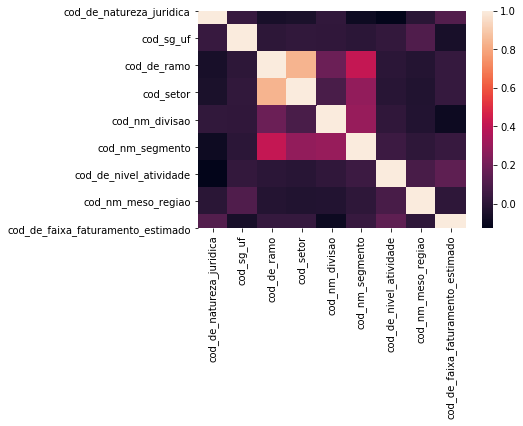

In [30]:
# Corelação entre as features selecionadas para treinamento
sns.heatmap(df_nao_nulos[train].corr());

### Analisando os Portfólios

In [31]:
# Verificando tamando dos clientes
print('O cliente 1 tem um portfólio com:', df1.shape[0], 'clientes')
print('O cliente 2 tem um portfólio com:', df2.shape[0], 'clientes')
print('O cliente 3 tem um portfólio com:', df3.shape[0], 'clientes')

O cliente 1 tem um portfólio com: 555 clientes
O cliente 2 tem um portfólio com: 566 clientes
O cliente 3 tem um portfólio com: 265 clientes


In [32]:
# Adicionando identificação dos portifólios
df1['portfolio'] = 1
df2['portfolio'] = 2
df3['portfolio'] = 3

In [33]:
# Juntando os clientes
df_clientes = df1.append(df2).append(df3)
# Identificando os clientes na base de mercado
df = df.join(df_clientes.set_index('id'), on='id')
df_nao_nulos = df_nao_nulos.join(df_clientes.set_index('id'), on='id')
# Preenchendo os demais portifolios do mercado como 0
df['portfolio'].fillna(0, inplace=True)
df_nao_nulos['portfolio'].fillna(0, inplace=True)
print('\n*** Base original***')
print(df['portfolio'].value_counts())
print('\n*** Base Após Tratamento***')
print(df_nao_nulos['portfolio'].value_counts())


*** Base original***
0.0    461020
2.0       566
1.0       555
3.0       265
Name: portfolio, dtype: int64

*** Base Após Tratamento***
0.0    461020
2.0       566
1.0       555
3.0       265
Name: portfolio, dtype: int64


In [34]:
# Separando os portifolios para Analise
df_me = df.query('portfolio == 0')
df_p1 = df.query('portfolio == 1')
df_p2 = df.query('portfolio == 2')
df_p3 = df.query('portfolio == 3')

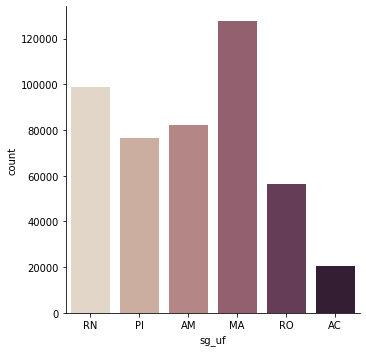

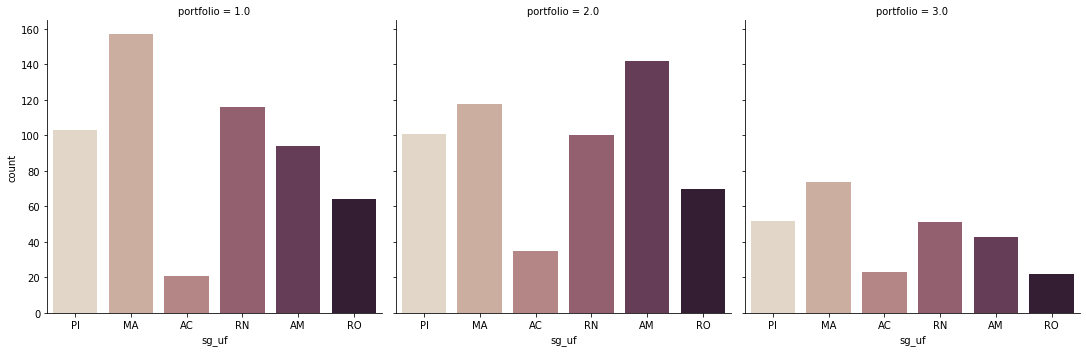

In [35]:
# Analisando os portfólios por UF
df_uf = df[['sg_uf','portfolio']]

sns.catplot(x="sg_uf", 
            kind="count", 
            palette="ch:.25", 
            data=df_uf.query('portfolio in (0,1,2,3)'));

sns.catplot(x="sg_uf", 
            kind="count", 
            palette="ch:.25", 
            data=df_uf.query('portfolio in (1,2,3)'),
            col="portfolio");

In [36]:
# Analisando a FAIXA DE FATURAMENTO dos portfólios
fat1 = df_p1['de_faixa_faturamento_estimado'].value_counts().index[0]
fat2 = df_p2['de_faixa_faturamento_estimado'].value_counts().index[0]
fat3 = df_p3['de_faixa_faturamento_estimado'].value_counts().index[0]
print('Os clientes do portfólio 1 tem uma faixa de faturamento', fat1)
print('Os clientes do portfólio 2 tem uma faixa de faturamento', fat2)
print('Os clientes do portfólio 3 tem uma faixa de faturamento', fat3)


Os clientes do portfólio 1 tem uma faixa de faturamento DE R$ 81.000,01 A R$ 360.000,00
Os clientes do portfólio 2 tem uma faixa de faturamento DE R$ 10.000.000,01 A R$ 30.000.000,00
Os clientes do portfólio 3 tem uma faixa de faturamento DE R$ 30.000.000,01 A R$ 100.000.000,00


In [37]:
# Analisando o RAMO dos portfólios
ramo1 = df_p1['de_ramo'].value_counts().index[0]
ramo2 = df_p2['de_ramo'].value_counts().index[0]
ramo3 = df_p3['de_ramo'].value_counts().index[0]
print('Os clientes do portfólio 1 atuam no ramo', ramo1)
print('Os clientes do portfólio 2 atuam no ramo', ramo2)
print('Os clientes do portfólio 3 atuam no ramo', ramo3)

Os clientes do portfólio 1 atuam no ramo COMERCIO VAREJISTA
Os clientes do portfólio 2 atuam no ramo ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL
Os clientes do portfólio 3 atuam no ramo ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL


In [38]:
# Analisando o SETOR dos portfólios
setor1 = df_p1['setor'].value_counts().index[0]
setor2 = df_p2['setor'].value_counts().index[0]
setor3 = df_p3['setor'].value_counts().index[0]
print('Os clientes do portfólio 1 atuam no setor', setor1)
print('Os clientes do portfólio 2 atuam no setor', setor2)
print('Os clientes do portfólio 3 atuam no setor', setor3)

Os clientes do portfólio 1 atuam no setor COMERCIO
Os clientes do portfólio 2 atuam no setor SERVIÇO
Os clientes do portfólio 3 atuam no setor SERVIÇO


### Analise apenas nas colunas de treinamento do modelo

In [39]:
# Analise dos portfólios
for x in train:
    print('Coluna analisada:', x)
    for y in (range(1,4)):
        result = df_nao_nulos.query('portfolio == @y')[x].value_counts().index[0]
        print('Portfolio', y, 'valor mais encontrado no portifolio', result)

Coluna analisada: cod_de_natureza_juridica
Portfolio 1 valor mais encontrado no portifolio 17
Portfolio 2 valor mais encontrado no portifolio 60
Portfolio 3 valor mais encontrado no portifolio 33
Coluna analisada: cod_sg_uf
Portfolio 1 valor mais encontrado no portifolio 2
Portfolio 2 valor mais encontrado no portifolio 1
Portfolio 3 valor mais encontrado no portifolio 2
Coluna analisada: cod_de_ramo
Portfolio 1 valor mais encontrado no portifolio 5
Portfolio 2 valor mais encontrado no portifolio 0
Portfolio 3 valor mais encontrado no portifolio 0
Coluna analisada: cod_setor
Portfolio 1 valor mais encontrado no portifolio 1
Portfolio 2 valor mais encontrado no portifolio 5
Portfolio 3 valor mais encontrado no portifolio 5
Coluna analisada: cod_nm_divisao
Portfolio 1 valor mais encontrado no portifolio 30
Portfolio 2 valor mais encontrado no portifolio 0
Portfolio 3 valor mais encontrado no portifolio 0
Coluna analisada: cod_nm_segmento
Portfolio 1 valor mais encontrado no portifolio 9


### Modelo Machine Learning

In [40]:
# Selecionando apenas as colunas para treinamento do modelo
X = df_nao_nulos[train]

In [41]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

**K-means**

O k-means é um método de Clustering que divide as observações dentre k grupos.

Para definir o número de k utilizei o metodo elbow e a avaliação de performance do modelo.

In [42]:
# Centroides das features
kmeans.cluster_centers_

array([[59.58506813,  2.81834311, 10.62158166,  2.53282315, 27.10240821,
         9.45866058,  0.94546035,  7.72103283,  8.67350729],
       [16.48708398,  2.6267519 ,  5.56501485,  1.45111969, 31.08841881,
         9.35373945,  1.29640406,  7.75322962,  7.35048389],
       [23.79927216,  2.75595356, 22.07527981,  4.24930184, 75.27728302,
        12.67652879,  1.29172989,  7.40186248,  6.95046947],
       [14.1173226 ,  2.66095757, 22.69106942,  4.93260342,  9.93273362,
        10.95350654,  1.31852992,  7.84339232,  8.26950346]])

In [43]:
df_nao_nulos.shape

(462406, 34)

In [44]:
# Adicionando as classe no df
labels = kmeans.labels_
df_nao_nulos['kmeans'] = labels

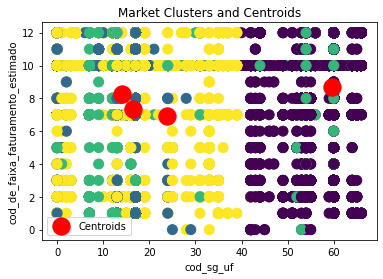

In [45]:
# Visualizando resultados
plt.scatter(X['cod_de_natureza_juridica'], X['cod_de_faixa_faturamento_estimado'], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 8], s = 300, c = 'red', label = 'Centroids')
plt.title('Market Clusters and Centroids')
plt.xlabel('cod_sg_uf')
plt.ylabel('cod_de_faixa_faturamento_estimado')
plt.legend()
plt.show()

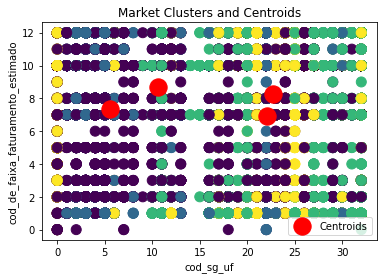

In [46]:
# Visualizando resultados
plt.scatter(X['cod_de_ramo'], X['cod_de_faixa_faturamento_estimado'], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 8], s = 300, c = 'red', label = 'Centroids')
plt.title('Market Clusters and Centroids')
plt.xlabel('cod_sg_uf')
plt.ylabel('cod_de_faixa_faturamento_estimado')
plt.legend()
plt.show()

In [47]:
# Verificando como ficou a divisão dos clusters
print('Divisão das classe pelo K-means')
df_nao_nulos['kmeans'].value_counts()

Divisão das classe pelo K-means


1    202428
2     90949
0     84544
3     84485
Name: kmeans, dtype: int64

### Analise dos Leds Gerados

In [48]:
# Filtrando apenas um portfólio
df_port = df_nao_nulos.query('kmeans == 3 and portfolio not in ("1")')

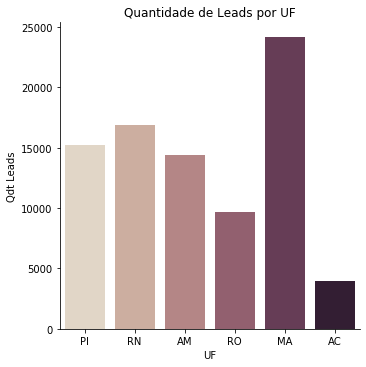

In [49]:
# Leads por UF
sns.catplot(x="sg_uf", 
            kind="count", 
            palette="ch:.25", 
            data=df_port)
plt.title('Quantidade de Leads por UF')
plt.xlabel('UF')
plt.ylabel('Qdt Leads')
#plt.legend()
plt.show()

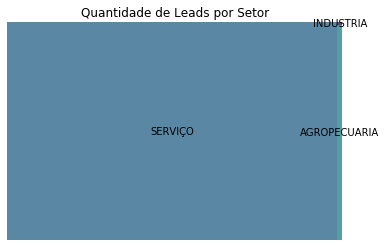

In [50]:
# Leads por Setor
treemap = df_port['setor'].value_counts()
sizes = treemap.values
label = treemap.index
sqy.plot(sizes=sizes, label=label, alpha=.8 )
plt.title('Quantidade de Leads por Setor')
plt.axis('off')
plt.show()

In [51]:
# Top por coluna
opcao = 'de_ramo'
df_port[opcao].value_counts()

SERVICOS DIVERSOS                                    37931
SERVICOS DE ALOJAMENTO/ALIMENTACAO                   25894
SERVICOS DE SAUDE                                     4574
SERVICOS ADMINISTRATIVOS                              4386
SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS        2354
TRANSPORTE, ARMAZENAGEM E CORREIO                     2243
ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL     1639
CULTURA, ESPORTE E RECREACAO                          1451
PRODUTOS DE AGROPECUARIA                              1134
SEGUROS, PLANOS DE PREVIDENCIA E PLANOS DE SAUDE       776
TELECOM                                                716
SERVICOS DE SANEAMENTO BASICO                          532
INDUSTRIA DIGITAL                                      453
SERVICOS FINANCEIROS                                   390
INDUSTRIAS EXTRATIVAS                                   12
Name: de_ramo, dtype: int64

### Validação do Modelo

#### Metódo Elbow

1 476744653.04468596
2 280062056.8478891
3 157763938.1321019
4 112853859.33417426
5 85559335.65717953
6 72251601.28238304
7 63056695.97468014
8 57593453.8731775
9 51672616.85723262
10 47409487.09376497


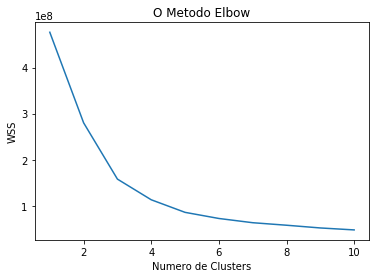

In [52]:
# Validação direta da divisão dos clusters
X_elbow = X
wcss = []
 
for i in range(1, 11):
    kmeans_elbow = KMeans(n_clusters = i)
    kmeans_elbow.fit(X_elbow)
    print (i, kmeans_elbow.inertia_)
    wcss.append(kmeans_elbow.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

O gráfico mostra o somatório da variância dos dados em relação ao número de clusters para conseguir verificar até que ponto com o aumento do número de clusters não existe ganho.

Observe que a partir do número de 2 clusters as distâncias dos erros quadráticos praticamente se estabiliza.

A partir desse ponto que não existe uma discrepância tão significativa em termos de variância.

#### Validação da Performance por Portfólio

In [53]:
# Validação da divisão dos clusters
X_valida = X
df_valida = df_nao_nulos
for i in range(3, 9):
    kmeans_valida = KMeans(n_clusters = i)
    kmeans_valida.fit(X_valida)
    df_valida['kmeans'] = kmeans_valida.labels_
    print('K =', i)
    for j in range(1,4):
        per_valida = df_valida.query('portfolio == @j')['kmeans'].value_counts().max()/df_valida.query('portfolio == @j').shape[0]
        class_valida = df_valida.query('portfolio == @j')['kmeans'].value_counts().index[0]
        print('Portfolio{}'.format(j), 'Cluster', class_valida, '- Percentual de acerto {:.0%}'.format(per_valida))
    print(47*'=')

K = 3
Portfolio1 Cluster 0 - Percentual de acerto 79%
Portfolio2 Cluster 1 - Percentual de acerto 55%
Portfolio3 Cluster 0 - Percentual de acerto 53%
K = 4
Portfolio1 Cluster 1 - Percentual de acerto 80%
Portfolio2 Cluster 0 - Percentual de acerto 55%
Portfolio3 Cluster 3 - Percentual de acerto 49%
K = 5
Portfolio1 Cluster 0 - Percentual de acerto 80%
Portfolio2 Cluster 1 - Percentual de acerto 48%
Portfolio3 Cluster 3 - Percentual de acerto 49%
K = 6
Portfolio1 Cluster 0 - Percentual de acerto 80%
Portfolio2 Cluster 5 - Percentual de acerto 35%
Portfolio3 Cluster 5 - Percentual de acerto 62%
K = 7
Portfolio1 Cluster 0 - Percentual de acerto 80%
Portfolio2 Cluster 2 - Percentual de acerto 33%
Portfolio3 Cluster 3 - Percentual de acerto 45%
K = 8
Portfolio1 Cluster 3 - Percentual de acerto 74%
Portfolio2 Cluster 5 - Percentual de acerto 33%
Portfolio3 Cluster 7 - Percentual de acerto 46%


O aumento do numero de k não traz um balanceamento do percentual de acerto nos portifólios, e nem um ganho.

Com 4 clusters a performance obtida no portfólio1 foi de 80%, no portfólio2 de 55% e no portfólio3 de 49%.

O que significa por exemplo que o Cluster 0 representa 80% dos seus clientes atuais do portfólio1.

